In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions_emt as f
from params_emt import *
import time
import pandas as pd
import anndata as ad

In [2]:
import importlib
importlib.reload(f)

tm = 1000.  # simulation time (dt=0.1 is set in the time_course_emt() function )
b = 1.

np.random.seed(0)

# load initial conditions for E, E/M, and M states
ics = np.loadtxt('ics_tristable_0.8.txt')
epi_ic, hyb_ic, mes_ic = ics[0], ics[1], ics[2]
E_epi, E_hyb, E_mes = epi_ic[-2], hyb_ic[-2], mes_ic[-2]

# sample multiple values of TGFB inducer
#tgf_list = [0.6, 0.8, 1, 1.2, 1.4, 1.6]
tgf_list = [0.6, 0.8, 1, 1.2, 1.4, 1.6,1.8,2.0,2.2,2.4]


step = 2000
adata_dict = {}
for tgf_val in tgf_list: 
    U,S = f.time_course_emt(b, tgf_val, tm, epi_ic, sigma=0.01, dt = 0.0001)#0.01
    adata = ad.AnnData(X=S[:,0:-1:step].T)
    adata.var_names = ['T', 's', 'S', 'R3', 'z', 'Z', 'R2', 'E', 'N']
    adata.layers['unspliced']=U[:,0:-1:step].T
    adata.layers['spliced']=adata.X
    adata.obs['tgf'] = tgf_val
    adata_dict[str(tgf_val)] = adata

In [3]:
adata = ad.concat(list(adata_dict.values()))
adata.obs_names_make_unique()
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 5000 × 9
    obs: 'tgf'
    layers: 'unspliced', 'spliced'

In [4]:
import scanpy as sc
sc.pp.neighbors(adata, n_neighbors = 20)
sc.tl.umap(adata)

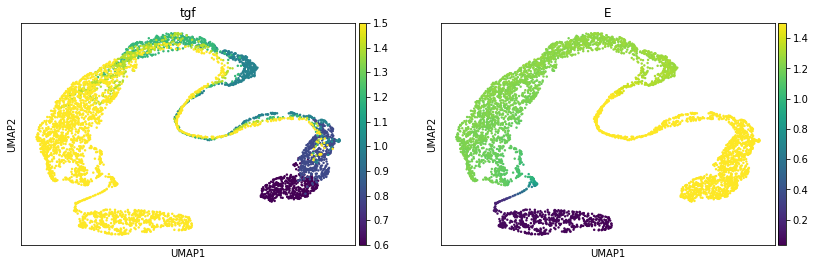

In [5]:
sc.pl.umap(adata, color =['tgf','E'],  vmax = [1.5,1.5])

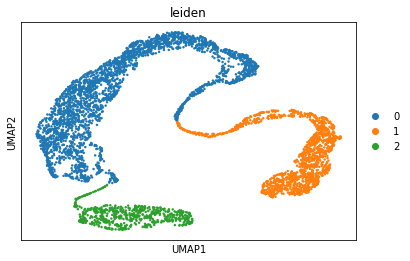

In [6]:
sc.tl.leiden(adata,resolution = 0.01)
sc.pl.umap(adata, color ='leiden')

In [7]:
adata.write('emt_circuit_larger_noise.h5ad')